<a href="https://colab.research.google.com/github/pawaraisha80/Site_performance-using-Python/blob/main/site_performance_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/python
%ls

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv("Site Performance Data.csv")

print(df)

   Sr. No.    Role Location Internet  Environment  Exact Time(Sec)
0        1   Admin     Pune      WLAN       Humid              2.0
1        2  Author    Karad      WiFi       Sunny              6.0
2        3    User   Mumbai      WiFi       Rainy              5.0
3        4  Author   Sangli      WLAN      Cloudy              1.0
4        5   Admin    Karad      WLAN      Cloudy              0.5
5        6    User     Pune      WiFi       Sunny              6.0
6        7   Admin   Mumbai      WLAN       Humid              7.0
7        8    User    Karad      WiFi       Rainy              4.0
8        9  Author     Pune      WLAN       Humid              5.0
9       10   Admin    Karad      WiFi       Sunny              2.0


In [ ]:
d = {'Pune': 0, 'Karad': 1, 'Sangli': 2, 'Mumbai': 3}
df['Location'] = df['Location'].map(d)
d = {'Admin': 0, 'Author': 1, 'User': 2}
df['Role'] = df['Role'].map(d)
d = {'WLAN': 0, 'WiFi': 1}
df['Internet '] = df['Internet '].map(d)
d = {'Humid': 0, 'Sunny': 1, 'Rainy': 2, 'Cloudy': 3}
df['Environment'] = df['Environment'].map(d)
print(df)

   Sr. No.  Role  Location  Internet   Environment  Exact Time(Sec)
0        1     0         0          0            0              2.0
1        2     1         1          1            1              6.0
2        3     2         3          1            2              5.0
3        4     1         2          0            3              1.0
4        5     0         1          0            3              0.5
5        6     2         0          1            1              6.0
6        7     0         3          0            0              7.0
7        8     2         1          1            2              4.0
8        9     1         0          0            0              5.0
9       10     0         1          1            1              2.0


In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
print(kmeans.cluster_centers_)

[[8.         1.         1.         0.6        0.8        4.8       ]
 [4.5        0.5        1.5        0.         3.         0.75      ]
 [2.         1.         1.33333333 0.66666667 1.         4.33333333]]


In [ ]:
my_list = df.values.tolist()

print(my_list)

[[1.0, 0.0, 0.0, 0.0, 0.0, 2.0], [2.0, 1.0, 1.0, 1.0, 1.0, 6.0], [3.0, 2.0, 3.0, 1.0, 2.0, 5.0], [4.0, 1.0, 2.0, 0.0, 3.0, 1.0], [5.0, 0.0, 1.0, 0.0, 3.0, 0.5], [6.0, 2.0, 0.0, 1.0, 1.0, 6.0], [7.0, 0.0, 3.0, 0.0, 0.0, 7.0], [8.0, 2.0, 1.0, 1.0, 2.0, 4.0], [9.0, 1.0, 0.0, 0.0, 0.0, 5.0], [10.0, 0.0, 1.0, 1.0, 1.0, 2.0]]


In [ ]:
x = [i[1] for i in my_list]
y = [i[2] for i in my_list]
print(x)
print(y)

[0.0, 1.0, 2.0, 1.0, 0.0, 2.0, 0.0, 2.0, 1.0, 0.0]
[0.0, 1.0, 3.0, 2.0, 1.0, 0.0, 3.0, 1.0, 0.0, 1.0]


In [ ]:
from sklearn.manifold import TSNE
my_tsne = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3)
df_embedded = my_tsne.fit_transform(df)


In [ ]:
df_embedded

array([[-16.417198 , -77.05618  ],
       [-43.07392  , -43.674217 ],
       [-47.544712 , -16.24479  ],
       [ 38.00092  , -67.22656  ],
       [ 63.834156 , -60.54713  ],
       [-20.711498 ,  95.0832   ],
       [-61.444073 ,  99.59412  ],
       [ -1.0294263, 123.80744  ],
       [ 22.481825 , 105.22349  ],
       [ 37.15994  , 144.75453  ]], dtype=float32)

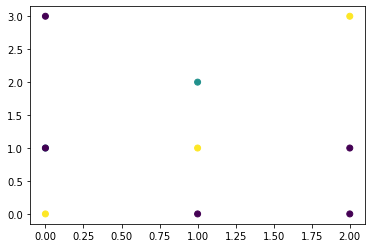

In [ ]:
plt.scatter(x, y, c=kmeans.labels_)
plt.show()

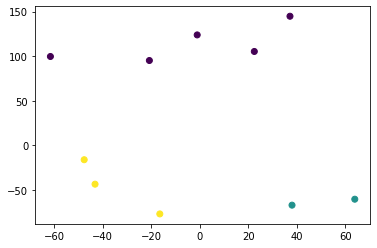

In [ ]:
plt.scatter(df_embedded[:,0], df_embedded[:,1], c=kmeans.labels_)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
my_pca = PCA(n_components=2)
x_embedded= my_pca.fit_transform(df)


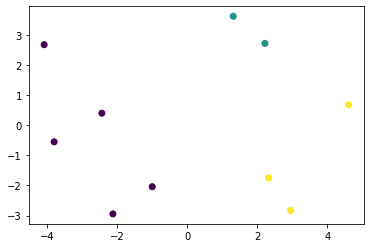

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_embedded[:,0], x_embedded[:,1], c=kmeans.labels_)
plt.show()